In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [179]:
data = pd.read_csv('/content/creditcard.csv')

In [180]:
pd.options.display.max_columns = None

In [181]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [182]:
data.shape

(284807, 31)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [184]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Feature Scaling

In [185]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [186]:
data = data.drop(['Time'],axis=1)

In [187]:
data.duplicated().any()

True

In [188]:
data = data.drop_duplicates()

In [189]:
data['Class'].value_counts()

,count
Class,
0,275190
1,473


# EDA

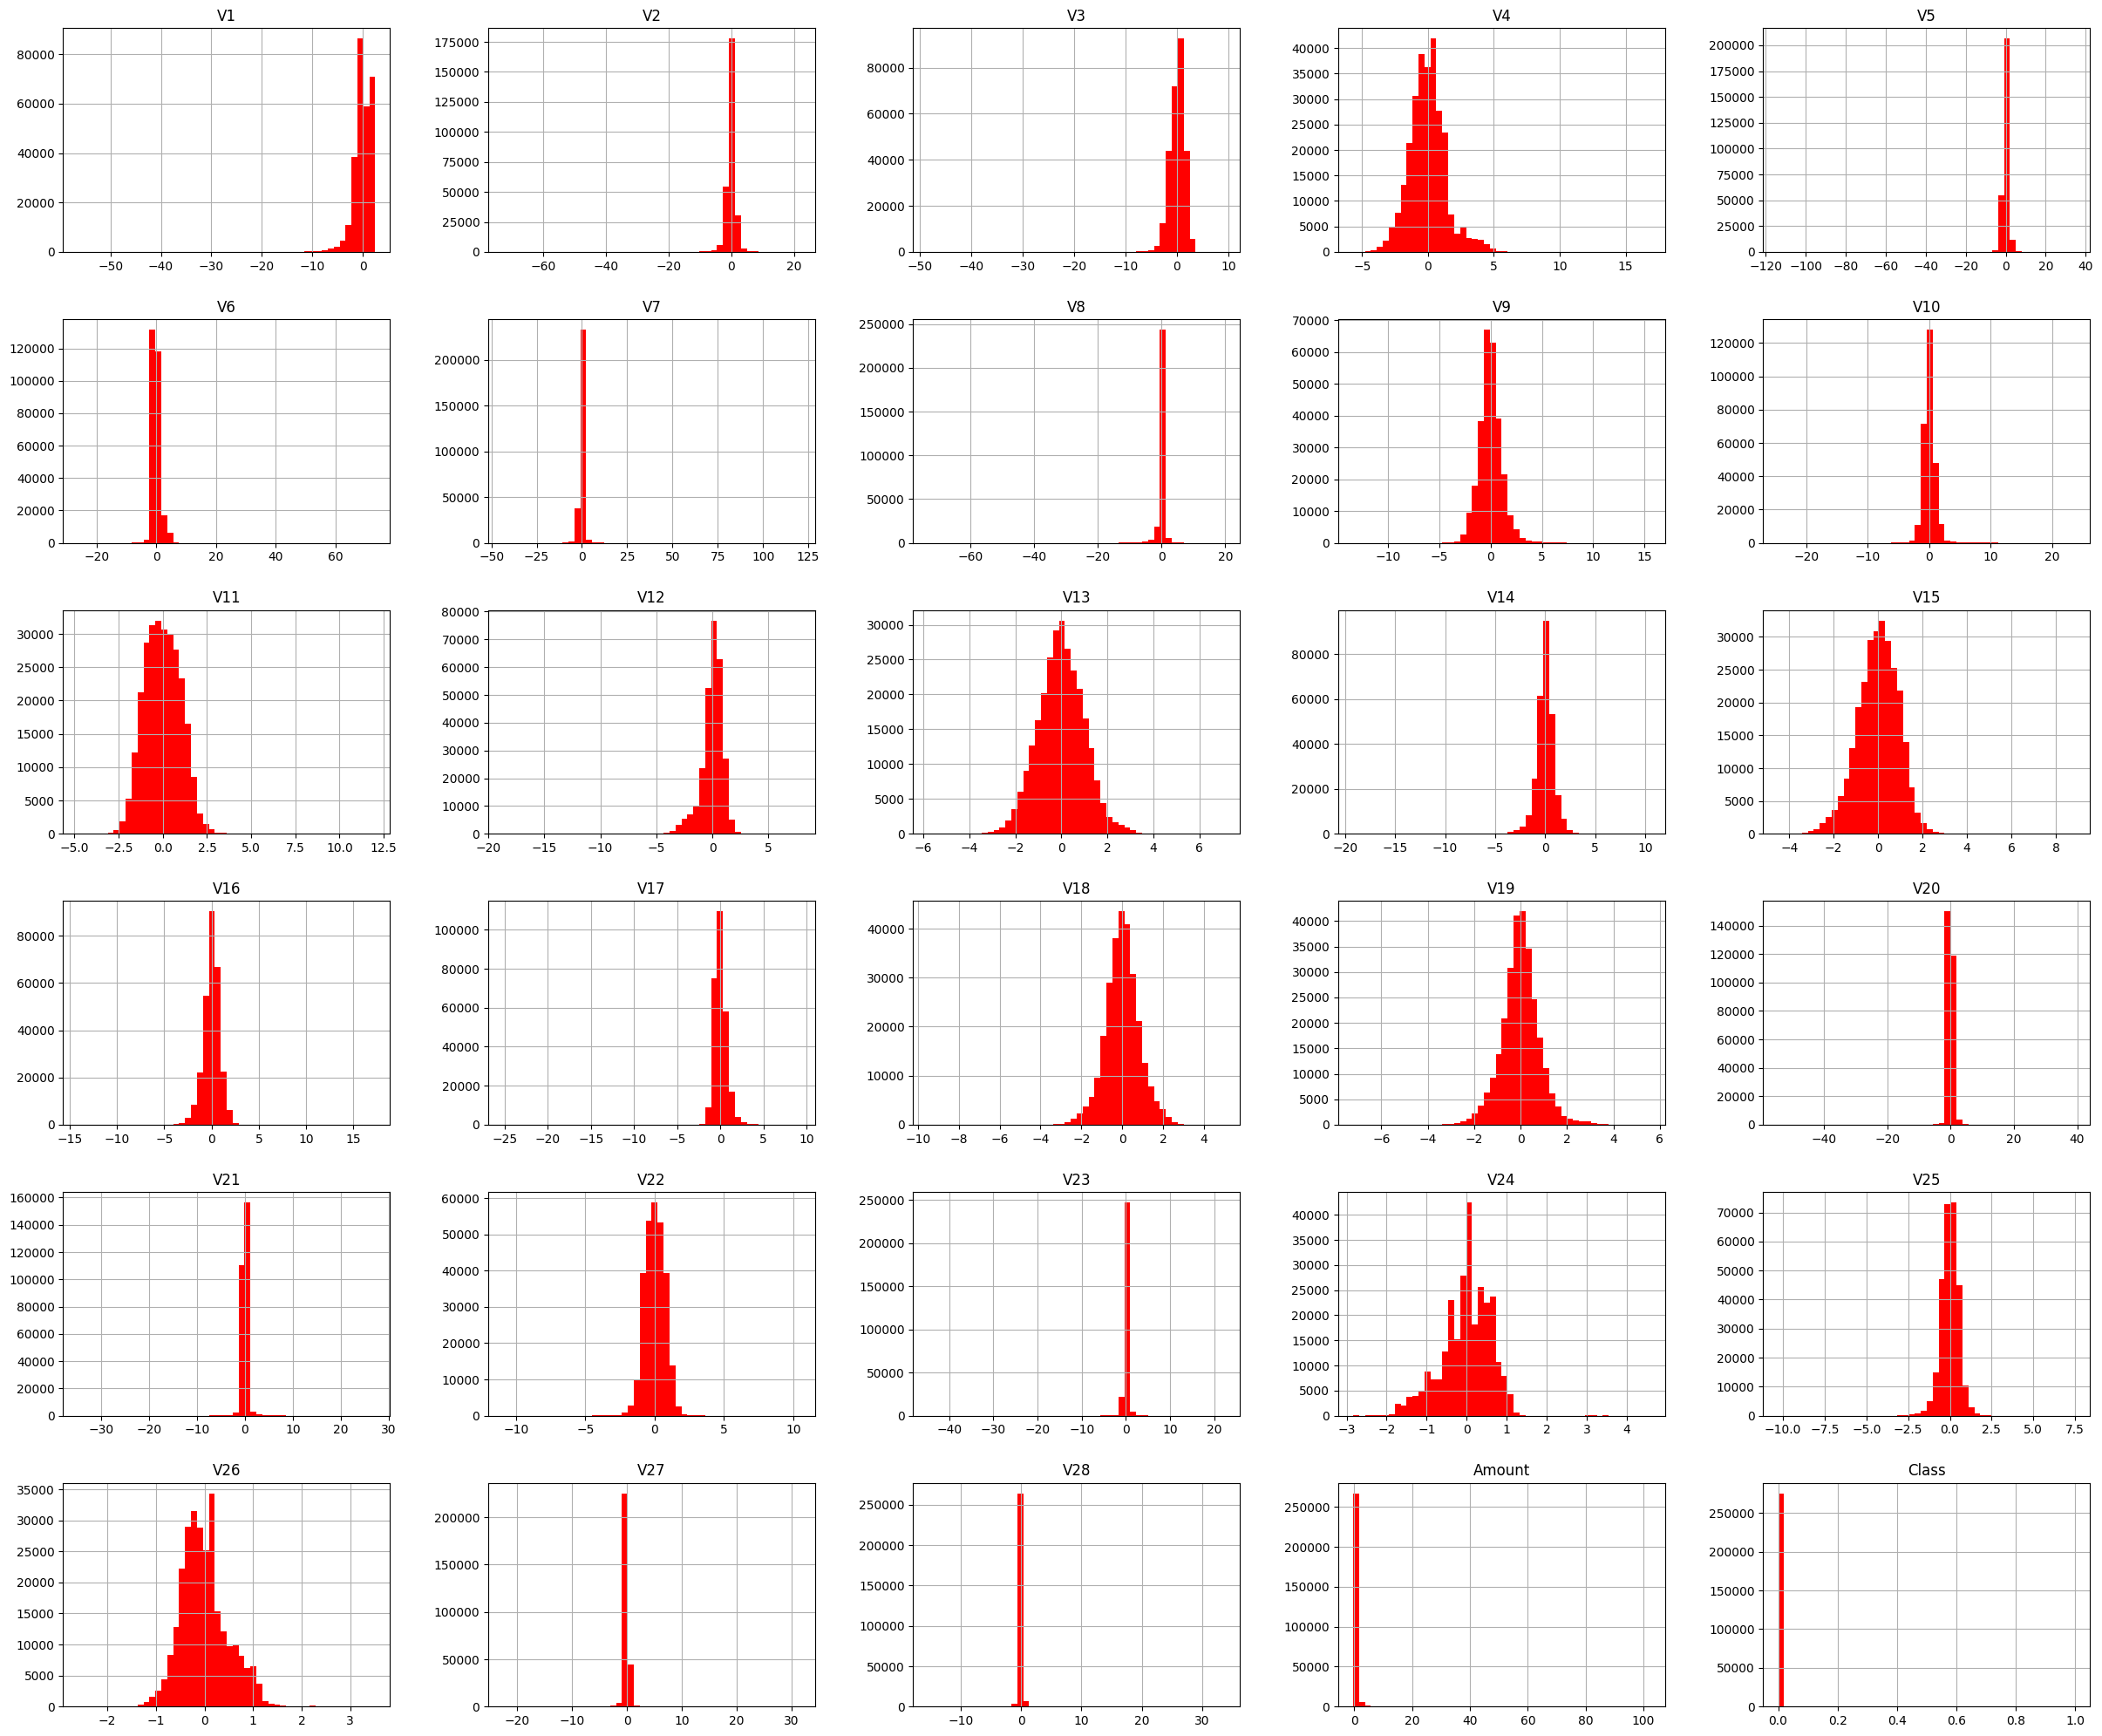

In [190]:
data.hist(bins=50, figsize=(30,25) , color = 'red')
plt.show()

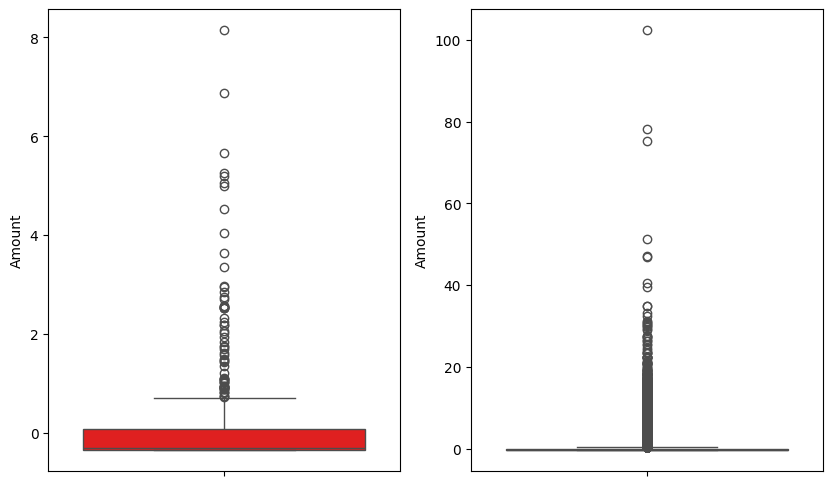

In [191]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
fraud_data = data[data['Class'] == 1]['Amount']
sns.boxplot(fraud_data, color = 'red')
plt.subplot(1, 2, 2)
non_fraud_data = data[data['Class'] == 0]['Amount']
sns.boxplot(non_fraud_data, color = 'red')
plt.show()


# Handling Imbalanced Dataset

# Strategy No.1 -->> Undersampling

In [192]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [193]:
normal.shape

(275190, 30)

In [194]:
fraud.shape

(473, 30)

In [195]:
normal_sample=normal.sample(n=473)

In [196]:
normal_sample.shape

(473, 30)

In [197]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [198]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [199]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

## Logistic Regression + Decision Tree for Undersampling

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



==========Logistic Regression===========

 Accuaracy: 0.9421052631578948



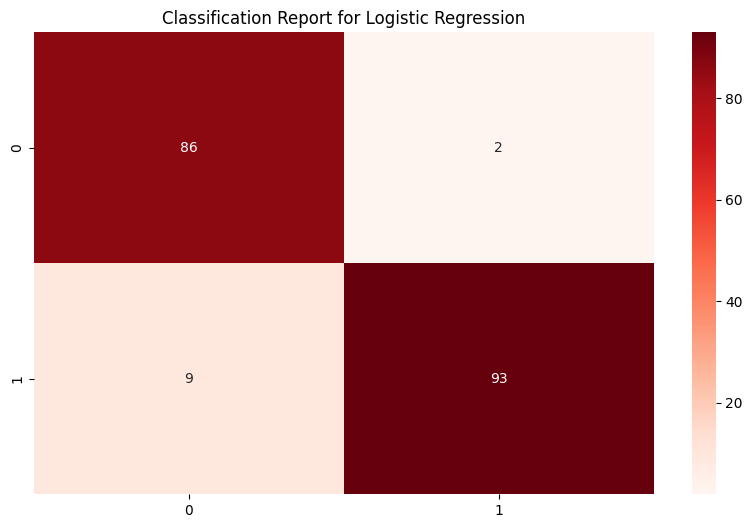


==========Decision Tree Classifier===========

 Accuaracy: 0.9210526315789473



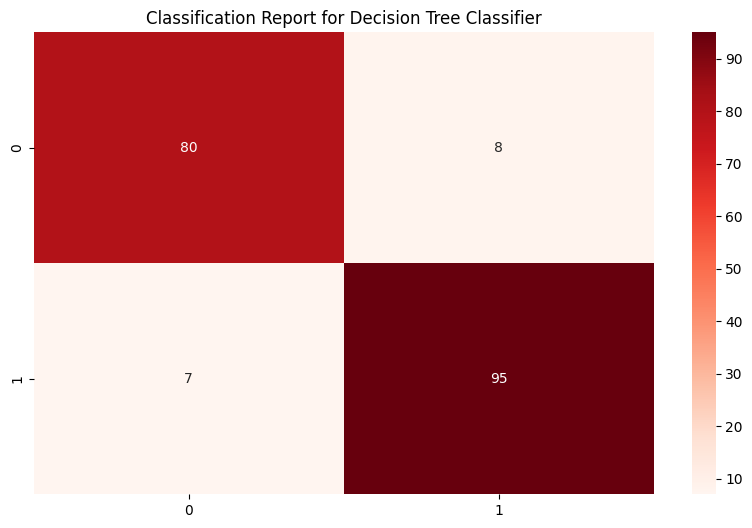


==========Random Forest Classifier===========

 Accuaracy: 0.9315789473684211



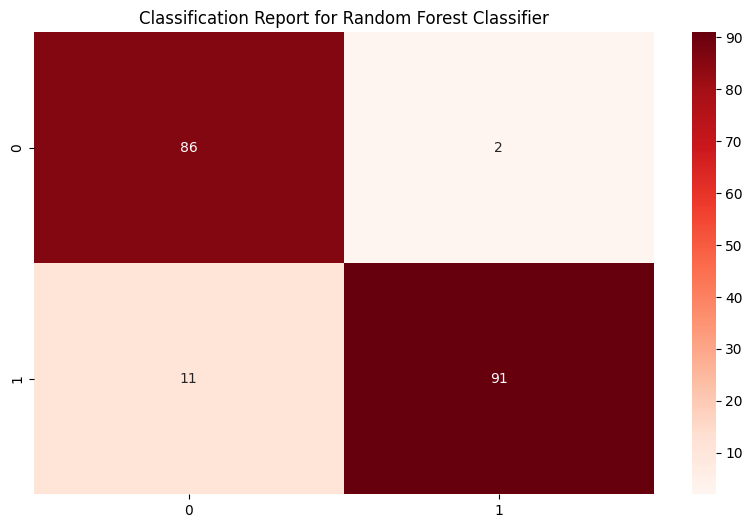

In [204]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}\n")

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.title(f"Confusion Matrix for {name}")
    plt.show()



# Strategy No.2 -->>Oversampling

In [205]:
X = data.drop('Class',axis=1)
y = data['Class']

In [206]:
X.shape , y.shape

((275663, 29), (275663,))

In [207]:
from imblearn.over_sampling import SMOTE

In [208]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [209]:
y_res.value_counts()

,count
Class,
0,275190
1,275190


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

## Logistic Regression + Decision Tree for Oversampling


==========Logistic Regression===========

 Accuaracy: 0.9992563437505668



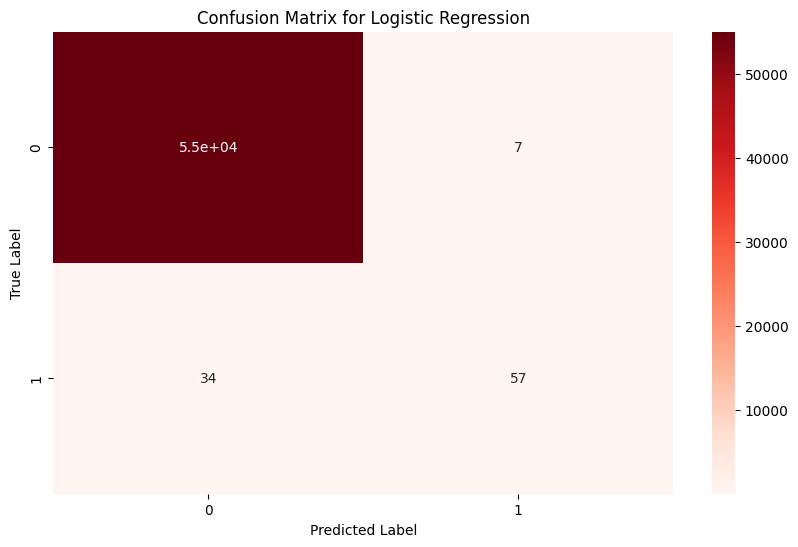


==========Decision Tree Classifier===========

 Accuaracy: 0.9989479984764116



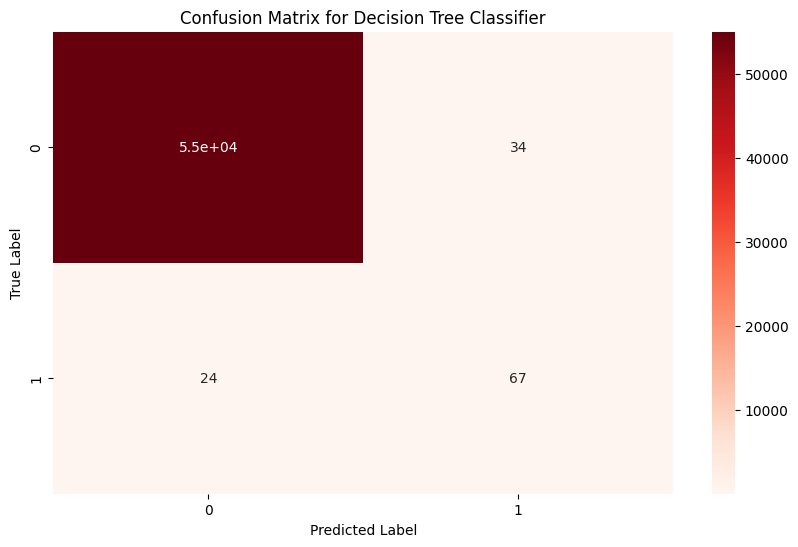


==========Random Forest Classifier===========

 Accuaracy: 0.9994558612809026



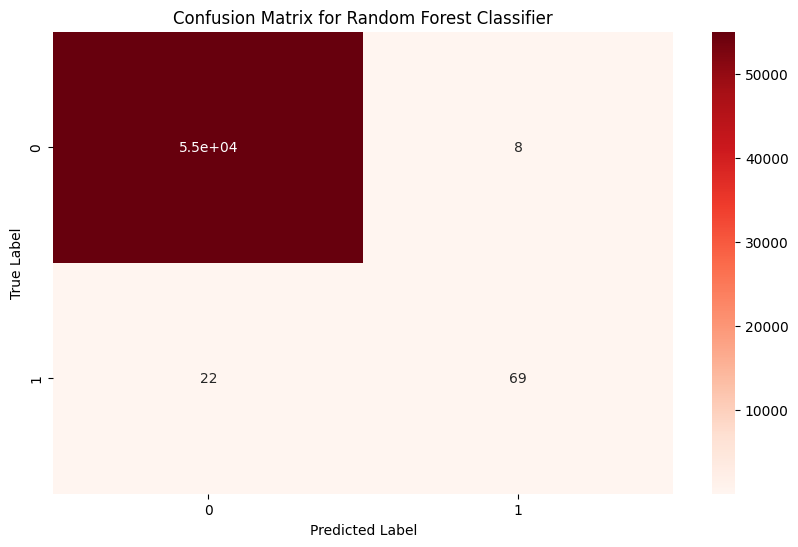

In [223]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 10)
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}\n")

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.title(f"Confusion Matrix for {name}")
    plt.show()




# Strategy No.3 -->> Balanced Random Forest

In [214]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [215]:
X = data.drop('Class',axis=1)
y = data['Class']

In [216]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
y_train.value_counts()

,count
Class,
0,220148
1,382


In [218]:
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)


BalancedRandomForestClassifier(random_state=42)

In [219]:
y_pred = classifier.predict(X_test)


 Accuaracy: 0.9893167431483866



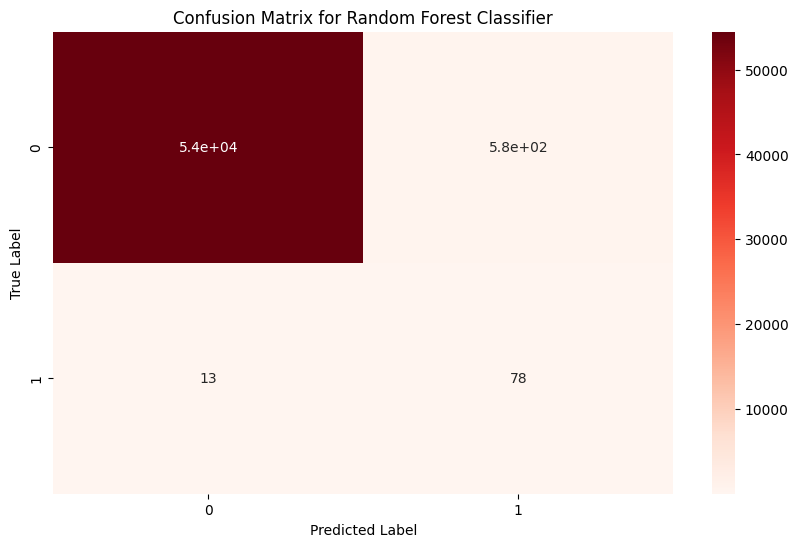

In [222]:
print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds")
plt.title(f"Confusion Matrix for {name}")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()